# Sampled video EDA
Just a short notebook to get a few insights into how the video database looks. 
Main objective is to get a feeling for the distribution of the views, likes and dislikes and how they correlate. 


In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import fabulus

import pandas as pd
import src.eda.eda_util as eda_util
from src.preprocessing.indexer import Indexer

import os
%pwd
%matplotlib inline

In [3]:
WDIR = 'H:\\Workspaces\\Projects\\PR_data_science\\src\\eda'
os.chdir(WDIR+'\\..\\..')
os.getcwd()

'H:\\Workspaces\\Projects\\PR_data_science'

In [4]:
# Fetch the data
X_train, X_test, y_train, y_test = Indexer.load_split('cache/tts_42')
df = X_train.append(X_test)
y = y_train.append(y_test)
df = eda_util.get_metaframe(df)
df.rename(columns={0: 'v_id', 1: 'n_samples'}, inplace=True)  # Backwards compatibility
df['viewcounts'] = y

# Replacing NaN's with 0 as these videos have 0 likes/dislikes
# TODO maybe replace with -1 to distinguish with real 0. 
df.fillna(value=0, inplace=True) 



## General Overview

At first, let us look at some sample rows:

In [5]:
# Showing some sample rows
df.head()



,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
912,cWGE9Gi0bB0,30,Shine On You Crazy Diamond Pt.2,Pink Floyd,303592.0,16612.0,802.0,4.792482,56844829
594,DumlIIHSrsQ,30,American Dream,Casting Crowns,8557.0,226.0,248.0,4.897074,2645372
564,qdOHPjMzY8s,30,The Boy With The Thorn In His Side,The Smiths,41534.0,850.0,185.0,4.919781,7154588
1822,5lVatZeQ68Y,30,Animals,Muse,1188.0,45.0,263.0,4.854014,175854
2019,S4ZWD_0VRK8,30,Wild World,Maxi Priest,53718.0,1992.0,215.0,4.856974,10029369


Afterwards, we compute some summary statistics of the data:

In [6]:
# Compute summary statistics
df.describe()


,n_samples,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
count,3871.0,3.871000e+03,3.871000e+03,3871.000000,3871.000000,3.871000e+03
mean,30.0,2.999390e+05,1.290113e+04,253.541720,4.880807,6.153432e+07
std,0.0,8.477762e+05,5.801464e+04,118.489541,0.109742,1.838643e+08
min,30.0,0.000000e+00,0.000000e+00,40.000000,2.934525,2.100000e+01
25%,30.0,2.427500e+03,5.500000e+01,209.000000,4.866445,3.467615e+05
50%,30.0,2.670100e+04,6.280000e+02,238.000000,4.902820,4.789629e+06
75%,30.0,1.854830e+05,5.172000e+03,276.000000,4.927784,3.526810e+07
max,30.0,1.152428e+07,1.555113e+06,4478.000000,5.000000,2.953195e+09


## Viewcounts
The viewcounts of all videos are inspected in this part, in order to get a feeling 
how the viewcounts of music-videos of all genres are distributed:

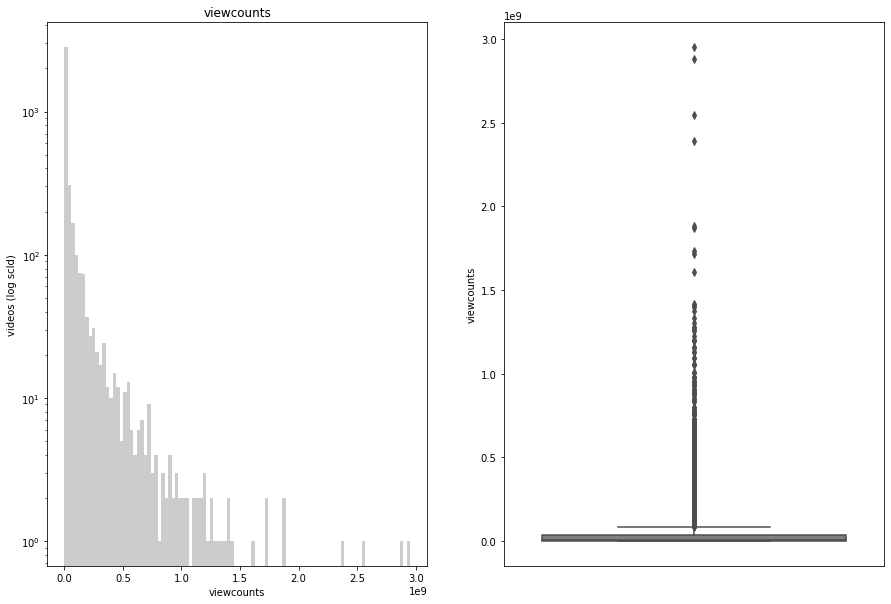

In [13]:
def plot_attribute(key: str, scale: str ='linear', color:str='grey', 
                   figsize:tuple=(15,10), kde: bool =False):
    fig, ax = plt.subplots(nrows=1,ncols=2, figsize=figsize)
    ax[0].set(yscale=scale)
    sns.distplot(df[key].to_numpy(), bins=100, color=color, kde=kde, ax=ax[0])
    ax[0].set_title(key)
    ax[0].set_xlabel(key)
    ax[0].set_ylabel('videos' if scale is 'linear' else 'videos (log scld)')
    
    sns.boxplot(data=df[key].to_numpy(), color=color, ax=ax[1])
    ax[1].set_ylabel(key)
    ax[1].set_xticks([])
    plt.show()
    
plot_attribute('viewcounts', 'log')

When looking at the histogram describing the viewcount distribution it looks like an 
exponential distribution. We also want to remark that the y-scale of the histogram is logarithmic, 
as otherwise we would only encounter a peak at 0.  
Furthermore, the boxplot on the right shows that approximately $75%$ of the videos in the dataset have viewcounts between
approximately 350k and 35kk views. Also there are many outliers and extremal points towards 3billion views.
As a result, it can be said that there is a majority of less viewed or less popular music-videos in the dataset mixed 
with a few very popular videos. 
The overall distribution of the views seems to behave exponential. 

#### Least viewed
In the following we look at the least viewed videos:

In [68]:
sorted_views = df.sort_values(by=['viewcounts'], ascending=True)
sorted_views.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
45,-FeCW1JfnCE,30,Future Past,Geneva Jacuzzi,4.0,0.0,82.0,5.0,21
1174,7SgI_9u9A9c,30,В наших глазах,Кино,4.0,0.0,172.0,5.0,42
995,EGGbzLspma4,30,His Name Is Mutty Ranks,A Tribe Called Quest,1.0,0.0,116.0,5.0,85
3331,_Djika1NFco,30,Into Extremes,Clan of Xymox,1.0,0.0,342.0,5.0,131
418,TJEhsSNeTvM,30,Dancing With a Ghost,Valencia,2.0,0.0,212.0,5.0,137


#### Most viewed
Furthermore, we also get a peek on the most viewed videos:

In [69]:
sorted_views.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
719,RBumgq5yVrA,30,Let Her Go,Passenger,9722598.0,325193.0,254.0,4.870542,2546728867
2627,pRpeEdMmmQ0,30,Waka Waka (This Time for Africa),Shakira,9818249.0,641884.0,211.0,4.754541,2391814721
373,uelHwf8o7_U,30,Love The Way You Lie,Eminem,8192551.0,307195.0,267.0,4.855434,1884840765


## Likes
The next step is to look on how the likes of the music videos are distributed:

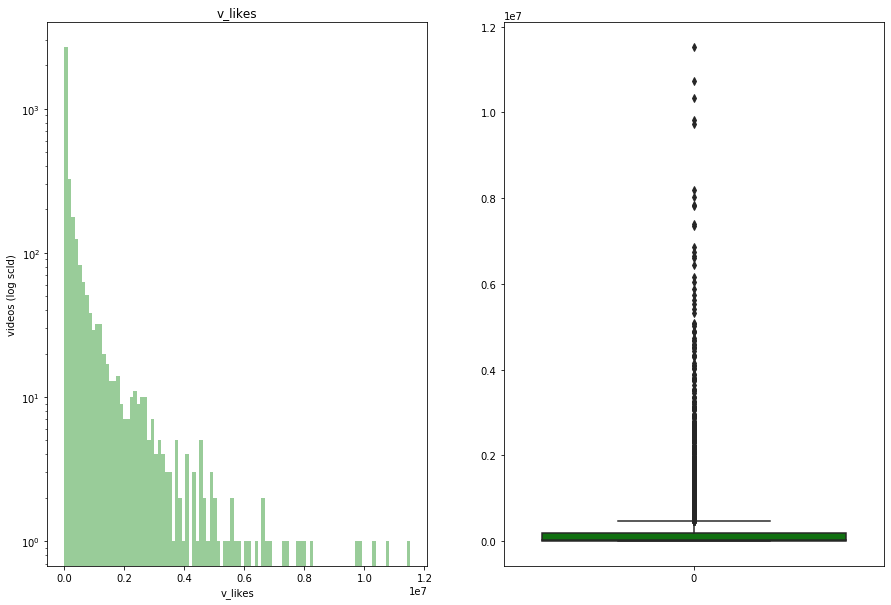

In [70]:
plot_attribute('v_likes', 'log', color='green')

Their distribution seems to be fairly equal to the distribution of the views also 
suggesting an underlying exponential distribution. Please also note that the y-axis is log-scaled.

#### Least liked
In the following we look at the least liked videos:

In [71]:
sorted_likes = df.sort_values(by=['v_likes'], ascending=True)
sorted_likes.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
3247,Q_gJQiUqWok,30,I'm Alive,Blind Guardian,0.0,0.0,361.0,4.962264,31299
2507,R_AQ7AkVzpM,30,Honey,Kara,0.0,0.0,197.0,4.873092,3284903
1926,aPTuKT5st10,30,Flight Being,Bernward Koch,0.0,0.0,260.0,4.780488,59097
1286,pl5pwDpZdu0,30,Regeneration,Stone Temple Pilots,0.0,0.0,241.0,4.863637,3986
3848,HxT9nRZNOiM,30,Bumpkin,Star Slinger,0.0,0.0,227.0,5.000000,10001


#### Most liked
Furthermore, we also get a peek on the most liked videos:

In [72]:
sorted_likes.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2252,XbGs_qK2PQA,30,Rap God,Eminem,11524278.0,384222.0,369.0,4.870942,979811289
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541
2627,pRpeEdMmmQ0,30,Waka Waka (This Time for Africa),Shakira,9818249.0,641884.0,211.0,4.754541,2391814721
719,RBumgq5yVrA,30,Let Her Go,Passenger,9722598.0,325193.0,254.0,4.870542,2546728867


## Dislikes
Same as for the likes and views we now inspect the dislikes. Just as it is the case for the likes 
and views they follow an exponential distribution, but compared to the like counts it appears to 
decline faster. Thus, we can say that there are not as many videos with high dislike counts as there are videos 
with high like counts. As a result, either people who dislike a video tend to not hit the dislike button or 
the overall quality of the videos is high. Most likely the second assumption is more probable, as there are mostly 
musicvideos made for more popular bands/song-creators. 

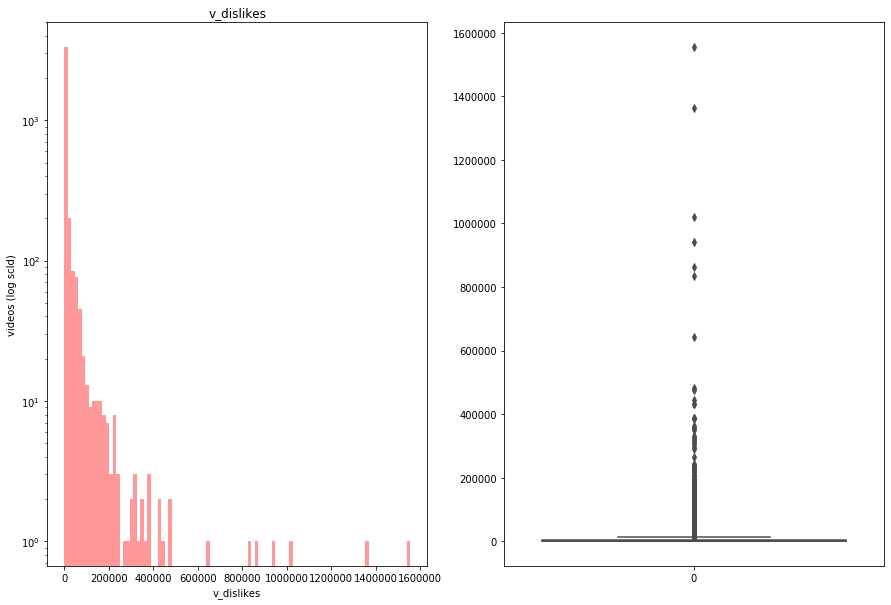

In [73]:
plot_attribute('v_dislikes', 'log', color='red')

#### Least dislikes
In the following we look at the least disliked videos:

In [74]:
sorted_dislikes = df.sort_values(by=['v_dislikes'], ascending=True)
sorted_dislikes.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2642,8EKukmvMJ1c,30,Three Days in a Row,Anouk,52.0,0.0,260.0,5.000000,3974
350,JlCMAFd-ouQ,30,Old Yellow Bricks,Arctic Monkeys,0.0,0.0,186.0,4.416666,3222
1717,hcsYG9iTeds,30,Yinxianghechengqi,Tortoise,22.0,0.0,155.0,5.000000,4177
2703,-ARxri21y1M,30,Music Was Saved,Starsailor,16.0,0.0,181.0,5.000000,1309
1810,ZP4Wau4z6ug,30,The Supreme Abstract,Blut aus Nord,44.0,0.0,187.0,5.000000,3737


#### Most dislikes
Furthermore, we inspect the videos with the most dislikes:

In [75]:
sorted_dislikes.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
2171,My2FRPA3Gf8,30,Wrecking Ball,Miley Cyrus,5419945.0,1555113.0,221.0,4.108186,1055364657
2043,LrUvu1mlWco,30,We Can't Stop,Miley Cyrus,3772655.0,1363910.0,213.0,3.937882,875538230
1091,4GuqB1BQVr4,30,Boyfriend,Justin Bieber,4509750.0,1020224.0,211.0,4.262041,772678855
2834,cwQgjq0mCdE,30,I'm in It,Kanye West,5874003.0,942912.0,130.0,4.446722,515158517
2346,ASO_zypdnsQ,30,Gentleman,Psy,5751485.0,863962.0,233.0,4.477610,1282273617


## Average Rating
Furthermore, youtube video metadata provides us with so called average ratings 
of the videos so we will shortly take a look at them:

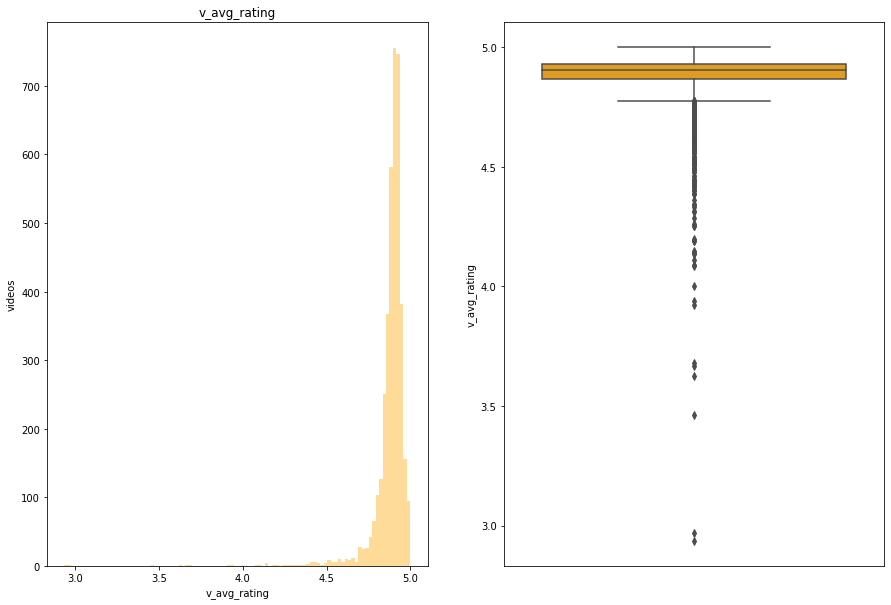

In [14]:
plot_attribute('v_avg_rating', color='orange')

## Connections
At last, we want to check the relations between the different features. 
Here we can see that the relation between likes and dislikes is not linear, thus 
a video tends to have more likes than dislikes. 

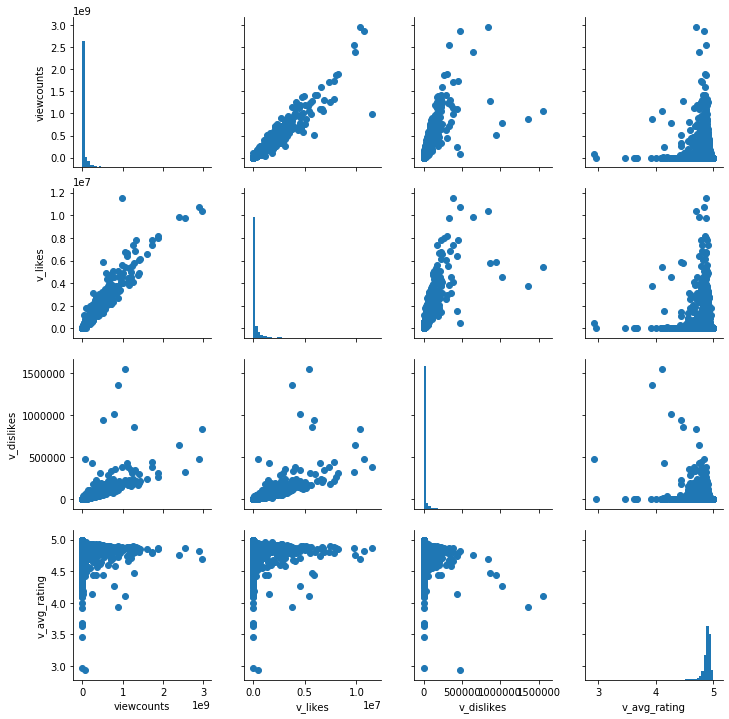

In [77]:
pair_grid = sns.PairGrid(data=df[['viewcounts', 'v_likes', 'v_dislikes', 'v_avg_rating']])
pair_grid.map_offdiag(plt.scatter)
pair_grid.map_diag(plt.hist, bins=50)
plt.show()

# LIKE/DISLIKE RATIO
TODO maybe investigate this ratio

## Conclusion
Overall, it can be said that the number of views, the likes and the dislikes appear to be distributed exponentially.
Furthermore, likes tend to be higher than the amount of dislikes. 
It is also interesting that there is a big chunk of videos located in the interval of 350k to 35kk views and 
that there are many outliers or extremal points having far higher viewcounts even reaching billions.



